In [38]:
import pandas as pd
import numpy as np
import yfinance as yf
from scipy.optimize import minimize, Bounds

In [2]:
tickers = ['^GSPC','GC=F']

In [ ]:
df = yf.download(tickers,start='2010-01-01')['Adj Close']

In [4]:
ret_df = np.log(df/df.shift(1))

In [5]:
W = np.ones(len(ret_df.columns)) / (np.ones(len(ret_df.columns))).sum()

In [ ]:
# We want to find the portfolio with the highest sharpe ratio
# We need a function that calculates the SR but in a negative way

In [12]:
def sharpe_pf(W,returns):
  pf_risk = (W.dot(returns.cov()).dot(W))**(1/2)
  SR = W.dot(returns.mean()) / pf_risk
  return -SR

In [13]:
sharpe_pf(W, ret_df) # for equally weighted portfolios

-0.037283163025179075

In [ ]:
# But is the equally wieghted portfolio the best choice?
# Our aim is to minimize the SP by finding the right weight balance

In [14]:
cons = ({'type':'eq','fun':lambda x: np.sum(x) -1}) # we need to set a constraint since the wights sum has be to be = 1 (100%)

In [15]:
# Minimization
minimize(sharpe_pf,W,ret_df,constraints=cons)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.0390362325004115
       x: [ 3.346e-01  6.654e-01]
     nit: 5
     jac: [ 1.460e-04 -7.341e-05]
    nfev: 15
    njev: 5

In [ ]:
# Overweighting the S&P500 is a better option

In [39]:
res = minimize(sharpe_pf,W,ret_df,bounds=Bounds(0,1),constraints=cons)
opt_W = res['x']
opt_W

array([0.33461542, 0.66538458])

In [40]:
ret_df.dot(opt_W).cumsum()

Date
2010-01-04         NaN
2010-01-05    0.002190
2010-01-06    0.007838
2010-01-07    0.009669
2010-01-08    0.013086
                ...   
2023-09-13    1.124949
2023-09-14    1.130692
2023-09-15    1.124943
2023-09-18    1.126777
2023-09-19         NaN
Length: 3451, dtype: float64

In [41]:
ret_df.dot(W).cumsum()

Date
2010-01-04         NaN
2010-01-05    0.001734
2010-01-06    0.009904
2010-01-07    0.010667
2010-01-08    0.014351
                ...   
2023-09-13    0.989443
2023-09-14    0.993876
2023-09-15    0.991332
2023-09-18    0.993716
2023-09-19         NaN
Length: 3451, dtype: float64

In [ ]:
# optimal weights > euqal weights

In [ ]:
# Another method wirth trial and error:

sharpes = []

for w in np.arange(0,1,0.01):
  weights = w, 1-w
  weights = np.array(weights)
  print(weights)
  sharpes.append(sharpe_pf(weights,ret_df))

<Axes: >

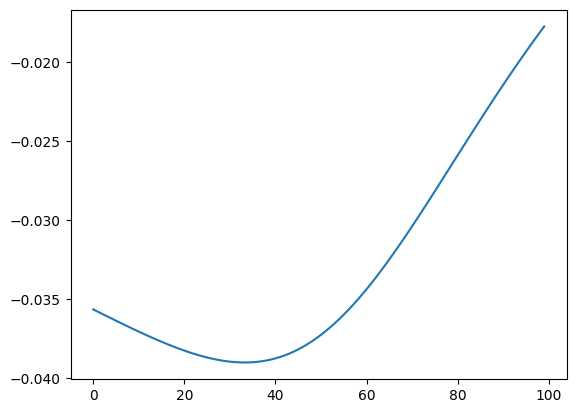

In [43]:
pd.Series(sharpes).plot()

In [ ]:
# We now want to split the data

In [44]:
train = ret_df[:int(len(ret_df) * 0.7)] # getting about 70% of the data starting from 2010

In [45]:
test = ret_df[int(len(ret_df) * 0.7):]

In [46]:
res_train = minimize(sharpe_pf, W, train, constraints=cons)
res_train['x']
# we get different weights

array([0.24441096, 0.75558904])

In [47]:
test.dot(res_train['x']).cumsum()

Date
2019-08-08    0.012484
2019-08-09    0.007288
2019-08-12   -0.000660
2019-08-13    0.010184
2019-08-14   -0.010061
                ...   
2023-09-13    0.388436
2023-09-14    0.394894
2023-09-15    0.387397
2023-09-18    0.388931
2023-09-19         NaN
Length: 1036, dtype: float64

In [48]:
sharpe_pf(res_train['x'], test)

-0.033169892115241864

In [49]:
sharpe_pf(W,test) # with equal weights we get a higher SP

-0.036224857695829005